### Introduction

Customer segmentation helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.The target of this project is to perform clustering to summarize customer segments.

In this project, I will perform an unsupervised clustering of data on the customer's records from a groceries firm's database.

#### Data Columns Description
##### People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome, Teenhome: Number of children\teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
#### Products
- MntWines, MntFruits : Amount spent on wine\fruits in last 2 years
- MntMeatProducts, MntFishProducts: Amount spent on meat\fish in last 2 years
- MntSweetProducts, MntGoldProds: Amount spent on sweets\gold in last 2 years
#### Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1-5: 1 if customer accepted the offer in the 1st-5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#### Place
- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month


### Table of Contents
1. Import the libraries
2. Load the data
3. Data Cleaning
4. Data Preprocessing
5. Data Exploration with Visualization
6. Dimensionality Reduction
7. Performing Clustering
8. Drawing observations from clusters.
9. Conclusion

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
data=pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
data.shape

(2240, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Cleaning

In [6]:
data.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [7]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)[0]

1.0714285714285714

In [8]:
data.duplicated().sum()

0

In [9]:
data.nunique().sort_values(ascending=False)

ID                     2240
Income                 1974
MntWines                776
Dt_Customer             663
MntMeatProducts         558
MntGoldProds            213
MntFishProducts         182
MntSweetProducts        177
MntFruits               158
Recency                 100
Year_Birth               59
NumWebVisitsMonth        16
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
Marital_Status            8
Education                 5
Teenhome                  3
Kidhome                   3
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Z_CostContact             1
Z_Revenue                 1
dtype: int64

In [10]:
# dropping rows where they contain missing values.
data.dropna(inplace=True)

### Observations
1. There are 2240 rows and 29 columns.
2. missing values are only in Income, which is 1% of total data.
3. Columns Z_CostContract,Z_Revenue have only one unique value, we can drop this column from data.
4. No duplicated values.
5. Date_customer is in incorrect data type.

### Data Preprocessing

* getting customer age.
* the date customers enrolled in the years range from 2012to 2014, data should be collected for analysis, let us take 2015 as final year for age calculation.

In [11]:
data['Age']=2015-data.Year_Birth

In [12]:
data.Age

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2216, dtype: int64

In [13]:
data.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [14]:
# we reduce the number of unique values in marital status column
# we replace the values with either relationship or single.
data['Marital_Status']=data['Marital_Status'].replace(['Married',"Together"],'Relationship')
data['Marital_Status']=data['Marital_Status'].replace(['Single',"Divorced",'Widow','Alone','Absurd','YOLO'],'Single')

In [15]:
# total children living in the home
data['Children']=data['Teenhome']+data['Kidhome']

In [16]:
data.Children.value_counts()

1    1117
0     633
2     416
3      50
Name: Children, dtype: int64

In [17]:
# total family members in the home
data['Family_Size']=data["Marital_Status"].replace({'Relationship':2,'Single':1})

In [18]:
data['Family_Size']=data['Family_Size']+data['Children']

In [19]:
data.Family_Size.value_counts()

3    880
2    757
4    296
1    252
5     31
Name: Family_Size, dtype: int64

In [20]:
# if the customer is a parent
data['is_parent']=np.where(data['Children']>0,1,0)

In [21]:
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [22]:
# taking education values into categories 
data['Education']=data['Education'].replace({'Graduation':'Graduate','PhD':'PostGraduate',
                                             'Master':'PostGraduate','2n Cycle':'Undergraduate','Basic':'Undergraduate'})

In [23]:
# total amount spent

data['total_spent'] =  data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

In [24]:
# total accepted campaigns
data['Accepted_Campaigns']= data['AcceptedCmp1'] + data['AcceptedCmp2'] +data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [25]:
# total number of purchases
data['Total_Purchases']=data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [26]:
# marital status 2
def marital_status_2(row):
    if row['is_parent']==1:
        return 'Family with Children'
    if row['Marital_Status']=='Relationship' and row['is_parent']==0:
        return 'Relationship'
    else:
        return 'Single'
data['marital_status_2']=data.apply(lambda row:marital_status_2(row),axis=1)
        

In [27]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

In [28]:
# number of days customer is with company
data['first_date']='01-01-2015'
data['first_date']=pd.to_datetime(data['first_date'])
data['days_engaged']=(data['first_date']-data['Dt_Customer']).dt.days

In [29]:
# dropping some features
drop_features=["Dt_Customer", "Z_CostContact","first_date", "Z_Revenue", "Year_Birth", "ID"]
data=data.drop(drop_features,axis=1)

In [30]:
data.describe().T

count          mean           std     min      25%  \
Income               2216.0  52247.251354  25173.076661  1730.0  35303.0   
Kidhome              2216.0      0.441787      0.536896     0.0      0.0   
Teenhome             2216.0      0.505415      0.544181     0.0      0.0   
Recency              2216.0     49.012635     28.948352     0.0     24.0   
MntWines             2216.0    305.091606    337.327920     0.0     24.0   
MntFruits            2216.0     26.356047     39.793917     0.0      2.0   
MntMeatProducts      2216.0    166.995939    224.283273     0.0     16.0   
MntFishProducts      2216.0     37.637635     54.752082     0.0      3.0   
MntSweetProducts     2216.0     27.028881     41.072046     0.0      1.0   
MntGoldProds         2216.0     43.965253     51.815414     0.0      9.0   
NumDealsPurchases    2216.0      2.323556      1.923716     0.0      1.0   
NumWebPurchases      2216.0      4.085289      2.740951     0.0      2.0   
NumCatalogPurchases  2216.0      2.671029      2.926734     0.0      0.0   
NumStorePurchases    2216.0      5.800993      3.250785     0.0      3.0   
NumWebVisitsMonth    2216.0      5.319043      2.425359     0.0      3.0   
AcceptedCmp3         2216.0      0.073556      0.261106     0.0      0.0   
AcceptedCmp4         2216.0      0.074007      0.261842     0.0      0.0   
AcceptedCmp5         2216.0      0.073105      0.260367     0.0      0.0   
AcceptedCmp1         2216.0      0.064079      0.244950     0.0      0.0   
AcceptedCmp2         2216.0      0.013538      0.115588     0.0      0.0   
Complain             2216.0      0.009477      0.096907     0.0      0.0   
Response             2216.0      0.150271      0.357417     0.0      0.0   
Age                  2216.0     46.179603     11.985554    19.0     38.0   
Children             2216.0      0.947202      0.749062     0.0      0.0   
Family_Size          2216.0      2.592509      0.905722     1.0      2.0   
is_parent            2216.0      0.714350      0.451825     0.0      0.0   
total_spent          2216.0    607.075361    602.900476     5.0     69.0   
Accepted_Campaigns   2216.0      0.298285      0.679209     0.0      0.0   
Total_Purchases      2216.0     14.880866      7.670957     0.0      8.0   
days_engaged         2216.0    538.006318    232.469034    26.0    366.0   

                         50%       75%       max  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               174.5    505.00    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         68.0    232.25    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     262.0  
MntGoldProds            24.5     56.00     321.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Age                     45.0     56.00     122.0  
Children                 1.0      1.00       3.0  
Family_Size              3.0      3.00       5.0  
is_parent                1.0      1.00       1.0  
total_spent            396.5   1048.00    2525.0  
Accepted_Campaigns       0.0      0.00       4.0  
Total_Purchases         15.0     21.00      44.0  
days_engaged           539.0    712.00    1089.0

* we can see that maximum age is 122, we can see data is old.
* there is much difference in 75% of income and maximum value of Income, there are some outliers in income column.

### Observation
1. Deriving customer age from year of birth.
2. Created 'marital_status_2' which tells about marital status with children.
3. Created feature 'Children', to get the count of total children in the family.
4. 'is_parent' feature to get the parenthood status.
5. For 'Education' feature, generalized them into three categories.
6. Created feature 'total_spent' which equals the sum of amount spent on all purchases.
7. Create Feature 'Accepted_campaigns' which sums  the total accepted campaigns in all the five campaigns.
8. Created Feature 'Total Purchases' which sums the total web purchases, store purchases, catalog purchases, deal purchases.
9. Created Feature 'days_engaged' which gives number of days from when customer started to shop, last date in the data.
10. Dropping some redundant features.

### Removing outliers

In [31]:
data=data[data['Age']<90]
data=data[data['Income']<600000]

In [32]:
data.shape

(2212, 33)

The total number of data points after removing outliers are 2212.

### Visualization

#### Correlation between selected features

<AxesSubplot:>

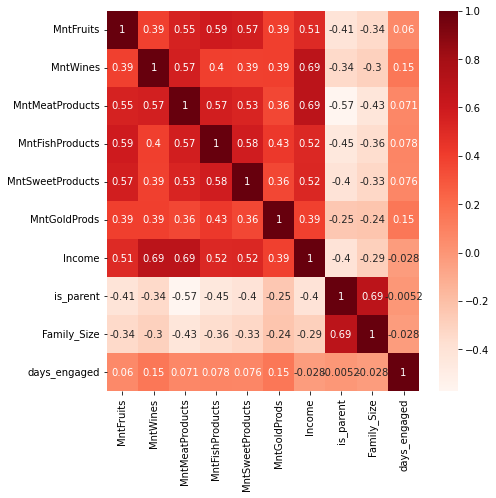

In [33]:
features_corr=data[['MntFruits','MntWines','MntMeatProducts','MntFishProducts',
               'MntSweetProducts','MntGoldProds','Income','is_parent',"Family_Size","days_engaged"]]
fig=plt.figure(figsize=(7,7))
sns.heatmap(features_corr.corr(),annot=True,cmap='Reds')

######  Amount of money spent on wine and meat products are positively correlated (0.69) with income.
###### Amount of money spent on fruits,wines, meat products, fish products, sweets, gold and income is inversely correlated with is_parent, family_size.
###### Number of days customers with company have very very less correlation with other columns, there is no significant relationship between Number of days and other columns.

### Customer Demographics

Text(0.5, 1.0, 'Total amount spent by Marital status and Education')

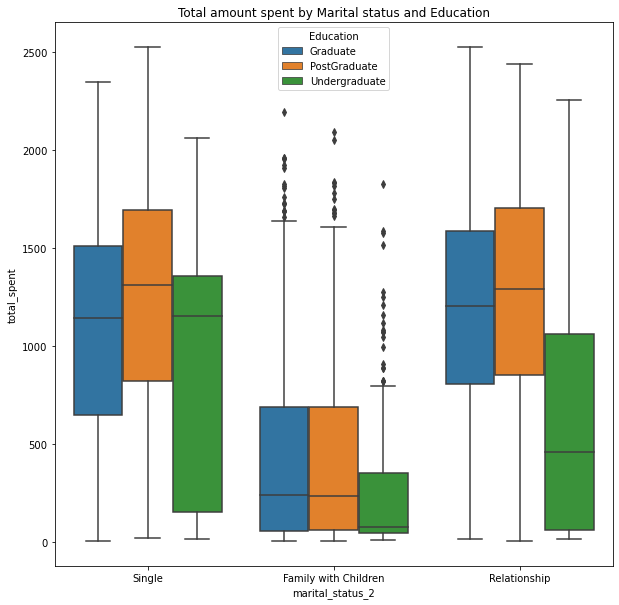

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='marital_status_2',y='total_spent',hue='Education')
plt.title("Total amount spent by Marital status and Education")

Text(0.5, 1.0, 'Total Purchases by Marital status and education')

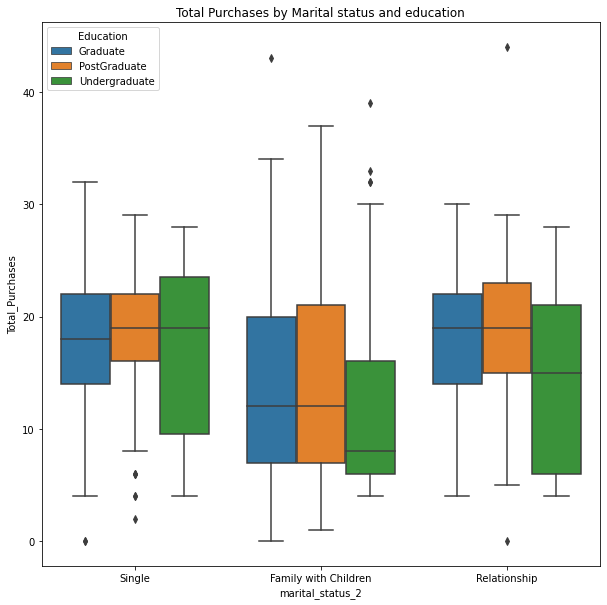

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='marital_status_2',y='Total_Purchases',hue='Education')
plt.title("Total Purchases by Marital status and education")

##### Observations:
###### In overall, customers with post graduate degree spends more.
###### Total amount spent and total purchases are low for marital status 'Family with Children".
###### Total Purchases made by customers who are single and undergraduate are high.
###### It is also seen that undergraduate students spends less in relationship, single, family with children.

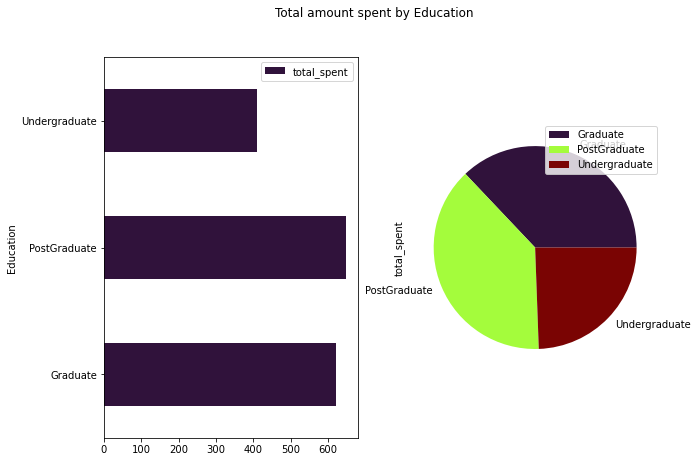

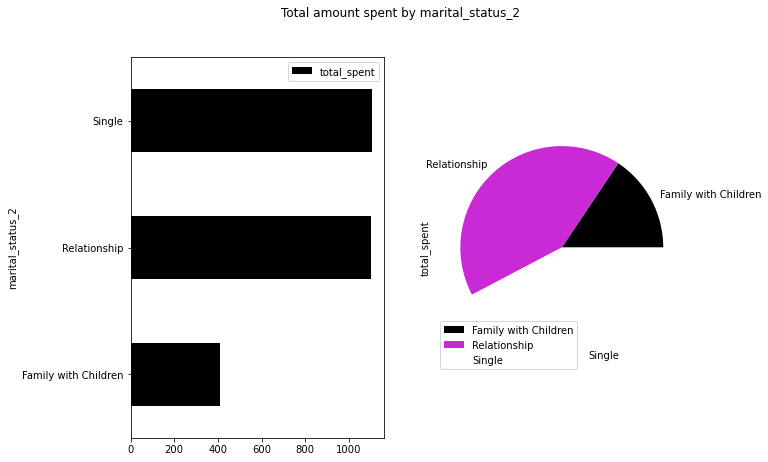

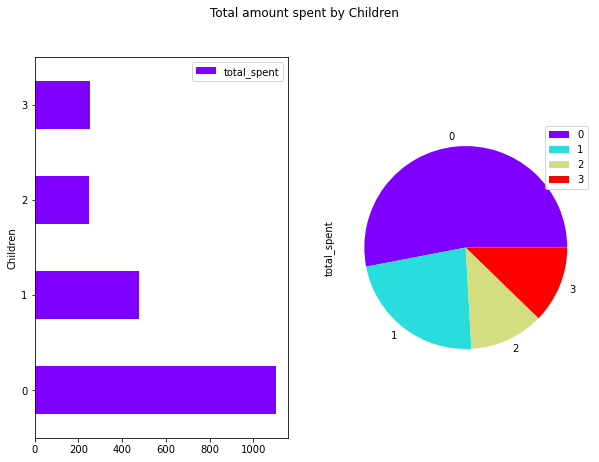

In [36]:
features=['Education','marital_status_2','Children']
colors= ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar']
for x in features:
    num=random.randint(0,len(colors)-1)
    fig,axes=plt.subplots(1,2,figsize=(10,7))
    table=pd.pivot_table(data,values='total_spent',index=x)
    title="Total amount spent by {}"
    plt.suptitle(title.format(x))
    table.plot(kind='barh',ax=axes[0],cmap=colors[num])
    table.plot(kind='pie',subplots=True,ax=axes[1],cmap=colors[num])

### Amount spent on Products

Text(0, 0.5, 'Total Amount Spent')

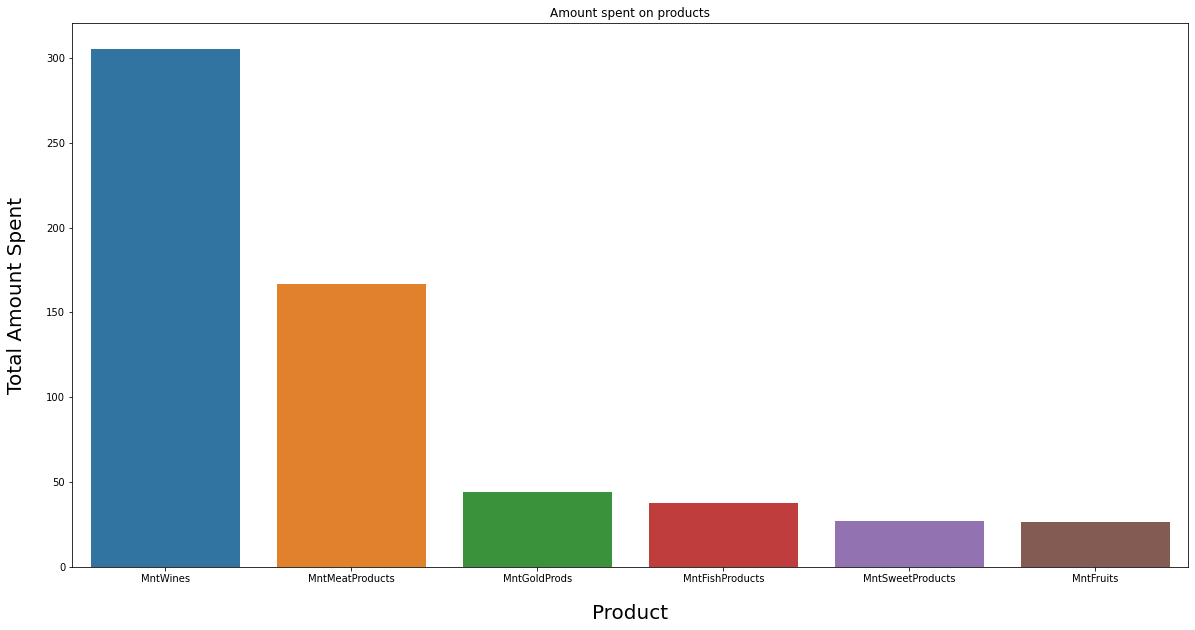

In [37]:
products=data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
products_mean=products.mean().sort_values(ascending=False)
products_df=pd.DataFrame(list(products_mean.items()),columns=['Products','Amount Spent'])

plt.figure(figsize=(20,10))
sns.barplot(data=products_df,x='Products',y='Amount Spent')
plt.title("Amount spent on products")
plt.xlabel("Product",fontsize=20,labelpad=20)
plt.ylabel("Total Amount Spent",fontsize=20,labelpad=20)


##### Wine and Meat products are purchased more.
###### Sweets and Fruits are less purchased


### Income vs Amount Spent

Text(0, 0.5, 'Total amount spent')

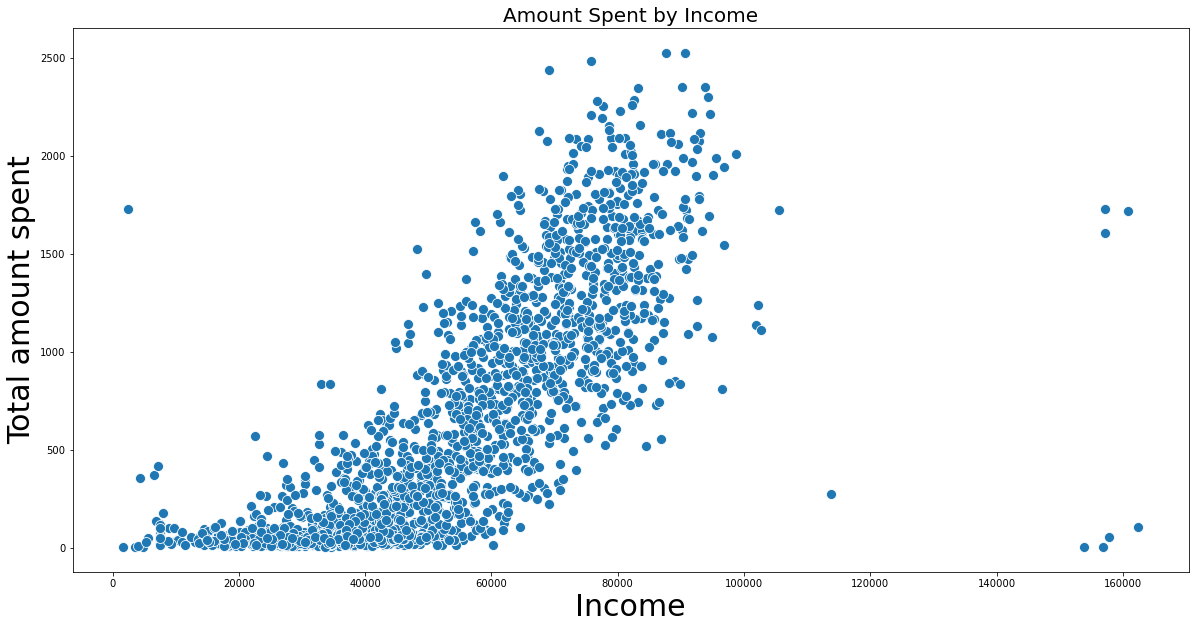

In [38]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data,x='Income',y='total_spent',s=100)
plt.title("Amount Spent by Income",fontsize=20)
plt.xlabel('Income',fontsize=30)
plt.ylabel('Total amount spent',fontsize=30)

### Age vs Income

Text(0, 0.5, 'Total Amount spent')

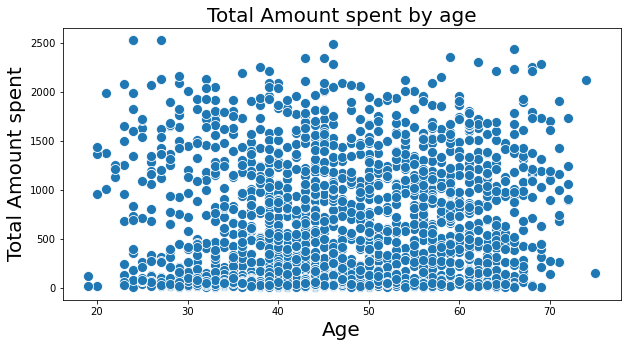

In [39]:
# scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Age',y='total_spent',s=100)
plt.title("Total Amount spent by age",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Total Amount spent",fontsize=20)

No inference canbe drawn from the above plot.

### Income Distribution

Text(0, 0.5, 'Count')

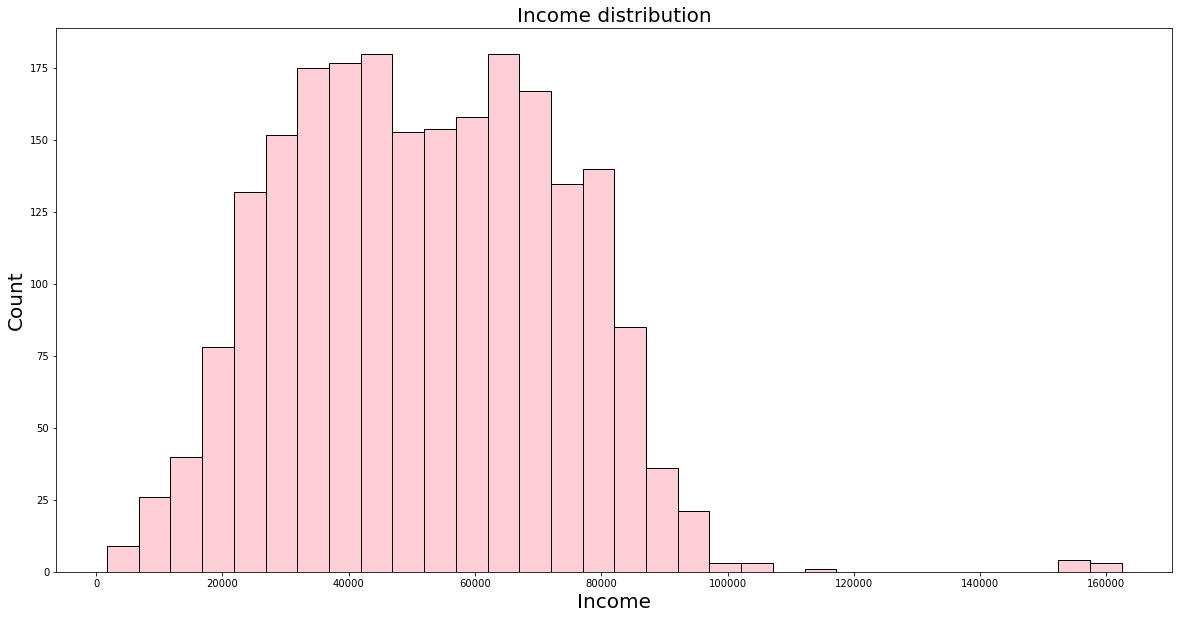

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(data.Income,color='pink')
plt.title('Income distribution',fontsize=20)
plt.xlabel('Income',fontsize=20)
plt.ylabel('Count',fontsize=20)

#### Most of the customers have income between 25000 and 85000

### Modelling

In [41]:
X = data.drop([  'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response'], axis=1)

In [42]:
X.columns

Index(['Income', 'Age', 'Children', 'Family_Size', 'is_parent', 'total_spent',
       'Accepted_Campaigns', 'Total_Purchases', 'marital_status_2',
       'days_engaged'],
      dtype='object')

In [43]:
X.head()

Income  Age  Children  Family_Size  is_parent  total_spent  \
0  58138.0   58         0            1          0         1617   
1  46344.0   61         2            3          1           27   
2  71613.0   50         0            2          0          776   
3  26646.0   31         1            3          1           53   
4  58293.0   34         1            3          1          422   

   Accepted_Campaigns  Total_Purchases      marital_status_2  days_engaged  
0                   0               25                Single           997  
1                   0                6  Family with Children           151  
2                   0               21          Relationship           498  
3                   0                8  Family with Children            91  
4                   0               19  Family with Children           347

In [44]:
X['marital_status_2']=X['marital_status_2'].map({'Single':2,'Relationship':1,'Family with Children':0})

In [45]:
from sklearn.cluster import KMeans

### Standardization

In [46]:
scaler=StandardScaler()
data_std=scaler.fit_transform(X)

### Dimensionality Reduction

In [47]:
pca=PCA()
pca.fit(data_std)

PCA()

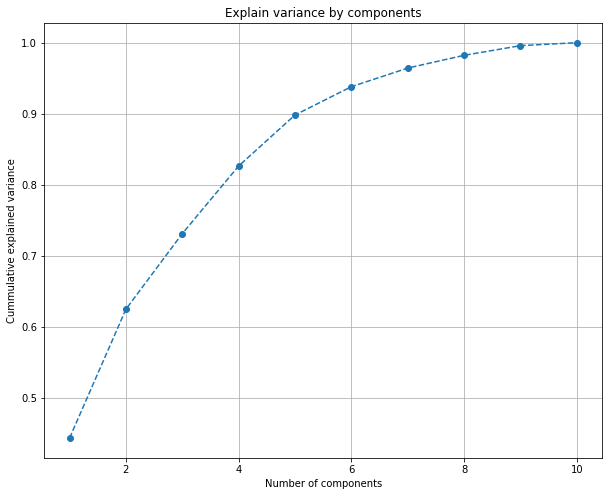

In [48]:
pca.explained_variance_ratio_
plt.figure(figsize=(10,8))
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum(),'o--')
plt.title("Explain variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cummulative explained variance")
plt.grid()
plt.show()

##### to preserve around 80% of variance, no of components = 3

In [49]:
pca=PCA(n_components=3)
pca.fit(data_std)

PCA(n_components=3)

In [50]:
scores_pca=pca.transform(data_std)

In [51]:
wcss=[]# with in cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)

In [52]:
wcss

[16176.254630086201,
 8464.461457500167,
 5978.647382166549,
 4734.837052424026,
 3955.0177241441097,
 3572.581674140744,
 3209.0640388651327,
 2885.2755277213914,
 2653.1070362484334,
 2428.3901936717084]

### Elbow plot

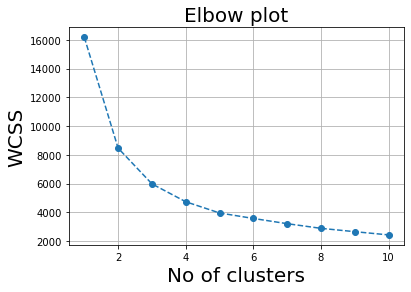

In [53]:
plt.plot(range(1,11),wcss,'o--')
plt.title('Elbow plot',fontsize=20)
plt.xlabel('No of clusters',fontsize=20)
plt.ylabel("WCSS",fontsize=20)
plt.grid()
plt.show()

##### There are two elbow points at no of clusters =2,4. We will select no of clusters equals 4 , because there after there is no significant drop. optimum number of clusters=4

In [54]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [55]:
X_kmeans=pd.concat([X.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
X_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3']
X_kmeans['clusters']=kmeans.labels_

In [56]:
X_kmeans.head()

Income  Age  Children  Family_Size  is_parent  total_spent  \
0  58138.0   58         0            1          0         1617   
1  46344.0   61         2            3          1           27   
2  71613.0   50         0            2          0          776   
3  26646.0   31         1            3          1           53   
4  58293.0   34         1            3          1          422   

   Accepted_Campaigns  Total_Purchases  marital_status_2  days_engaged  \
0                   0               25                 2           997   
1                   0                6                 0           151   
2                   0               21                 1           498   
3                   0                8                 0            91   
4                   0               19                 0           347   

   Component 1  Component 2  Component 3  clusters  
0     3.829095     0.176781     1.632005         1  
1    -2.102122     0.010799    -2.111433         0  
2     2.267797     0.371312    -0.241698         1  
3    -1.869326     1.459267    -1.128649         0  
4    -0.716111    -0.263990    -0.212264         0

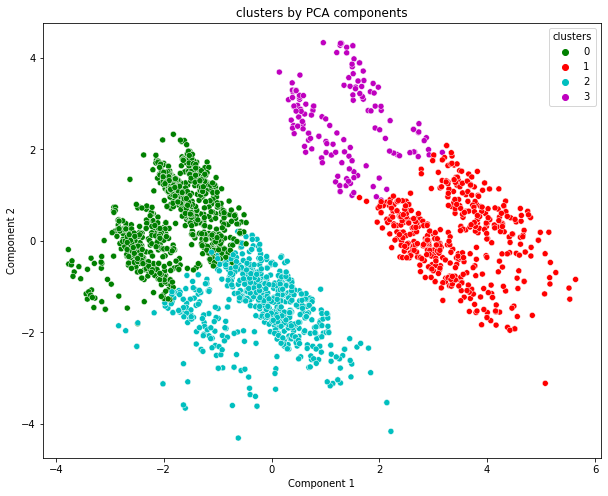

In [57]:
x_axis=X_kmeans['Component 1']
y_axis=X_kmeans['Component 2']
z_axis=X_kmeans['Component 3']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=X_kmeans['clusters'],palette=['g','r','c','m'])
plt.title("clusters by PCA components")
plt.show()

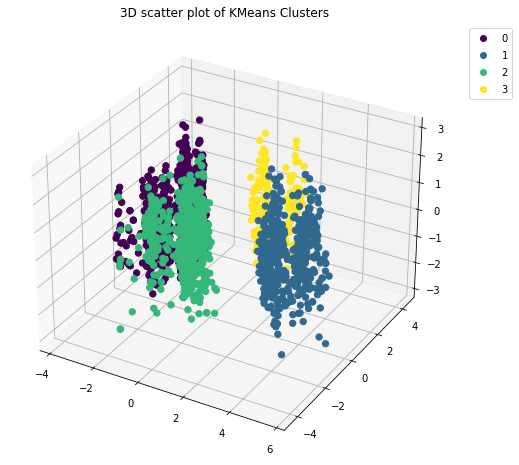

In [58]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
sc = ax.scatter(x_axis, y_axis, z_axis, s=40, c=X_kmeans['clusters'] ,alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.title("3D scatter plot of KMeans Clusters")
plt.show()

In [59]:
X['clusters']=kmeans.labels_

In [60]:
X.head()

Income  Age  Children  Family_Size  is_parent  total_spent  \
0  58138.0   58         0            1          0         1617   
1  46344.0   61         2            3          1           27   
2  71613.0   50         0            2          0          776   
3  26646.0   31         1            3          1           53   
4  58293.0   34         1            3          1          422   

   Accepted_Campaigns  Total_Purchases  marital_status_2  days_engaged  \
0                   0               25                 2           997   
1                   0                6                 0           151   
2                   0               21                 1           498   
3                   0                8                 0            91   
4                   0               19                 0           347   

   clusters  
0         1  
1         0  
2         1  
3         0  
4         0

In [61]:
X.clusters.value_counts()

0    929
2    651
1    472
3    160
Name: clusters, dtype: int64

### Variation of parameters by clusters

### Clusters by Income

Text(0, 0.5, 'Income')

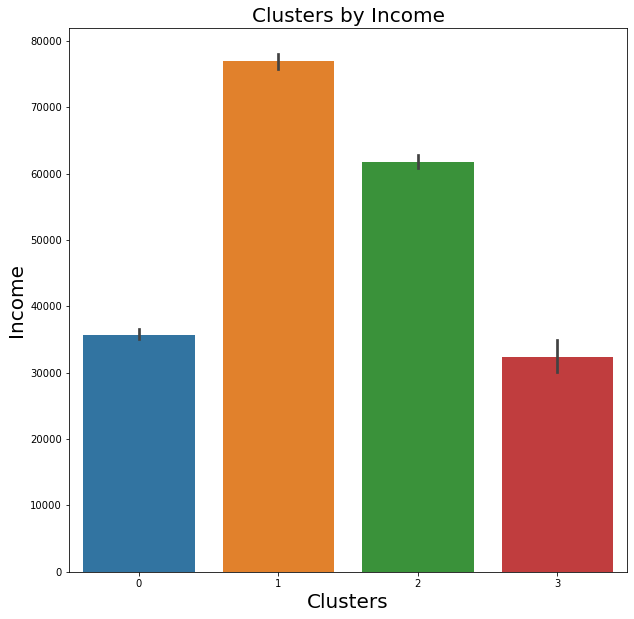

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(data=X,x='clusters',y='Income')
plt.title("Clusters by Income",fontsize=20)
plt.xlabel("Clusters",fontsize=20)
plt.ylabel("Income",fontsize=20)

#### low income - cluster 3, above low income - cluster 0,medium income - cluster 2,high income - cluster 1

### Clusters By Total Amount of Spendings

Text(0, 0.5, 'Total Spendings')

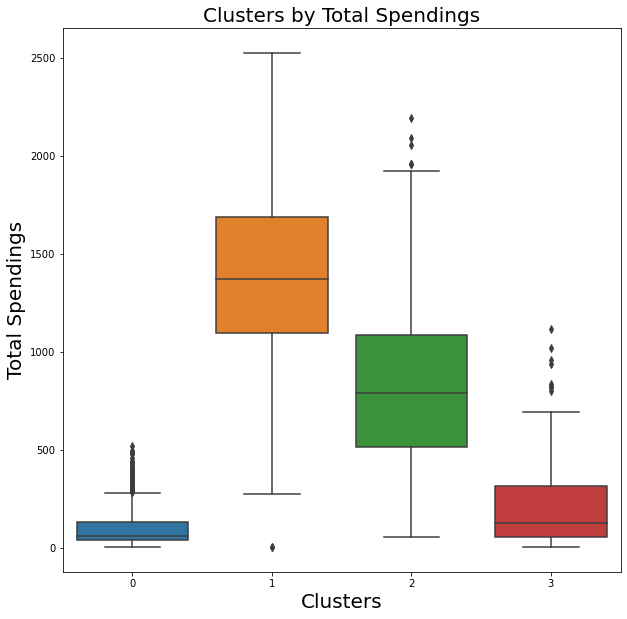

In [63]:
plt.figure(figsize=(10,10))
sns.boxplot(data=X,x='clusters',y='total_spent')
plt.title("Clusters by Total Spendings",fontsize=20)
plt.xlabel('Clusters',fontsize=20)
plt.ylabel('Total Spendings',fontsize=20)

### Clusters by Age

Text(0, 0.5, 'Age')

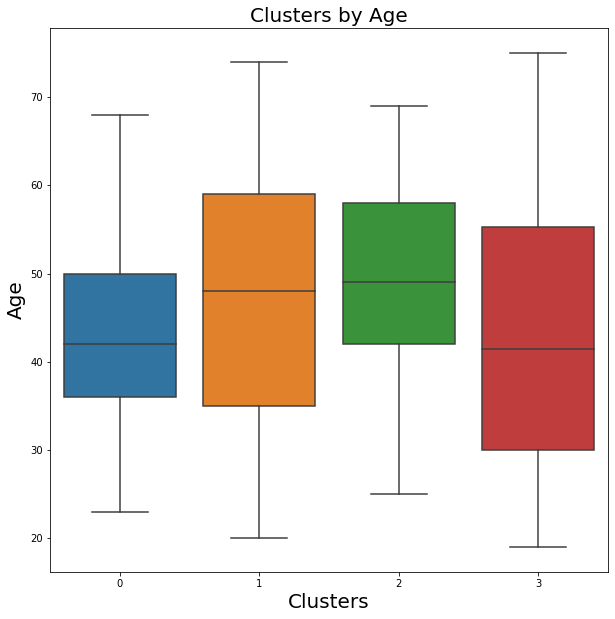

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(data=X,x='clusters',y='Age')
plt.title("Clusters by Age",fontsize=20)
plt.xlabel('Clusters',fontsize=20)
plt.ylabel('Age',fontsize=20)

### Interpretations
#### High Income and High Spendings - Cluster 1
#### Low income and very Less spendings - Cluster 2
#### Medium salary and medium spendings - Cluster 0
#### Low icome and low spendings- Cluster 3

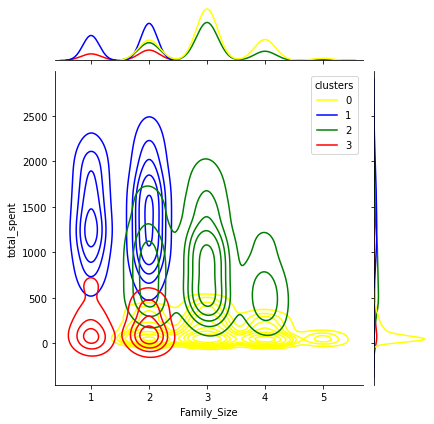

In [65]:
sns.jointplot(x=X['Family_Size'],y=X['total_spent'],hue=X['clusters'],kind='kde',palette=['yellow','blue','green','red'])

<AxesSubplot:xlabel='clusters', ylabel='Family_Size'>

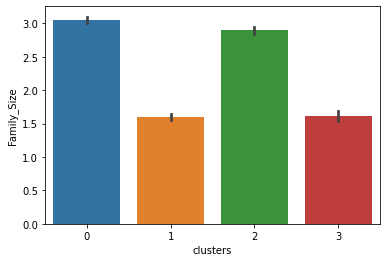

In [66]:
sns.barplot(x=X['clusters'],y=X['Family_Size'])

#### Replace Clusters 0,1,2,3 with names
* Highest earnings and Highest spendings - Platinum
* High earnings and High spendings -  Gold
* Low salary and less spendings - Silver
* Low salary and least spendings - Bronze

In [67]:
X['clusters']=X['clusters'].replace({0:'Bronze',1:'Platinum',2:'Gold',3:'Silver'})

In [68]:
data['clusters']=X.clusters

### Count of each cluster

In [69]:
cluster_counts=data.clusters.value_counts()
px.pie(cluster_counts,values=cluster_counts.values,names=cluster_counts.index)


*  Most customers are in Bronze zone, which is 42% of total number of customers.
* Second most number of customers are in Gold(29.4%), platinum (21.3%) zones.
* Least number of customers are in silver zone (7.23%)

### Income vs spendings by cluster

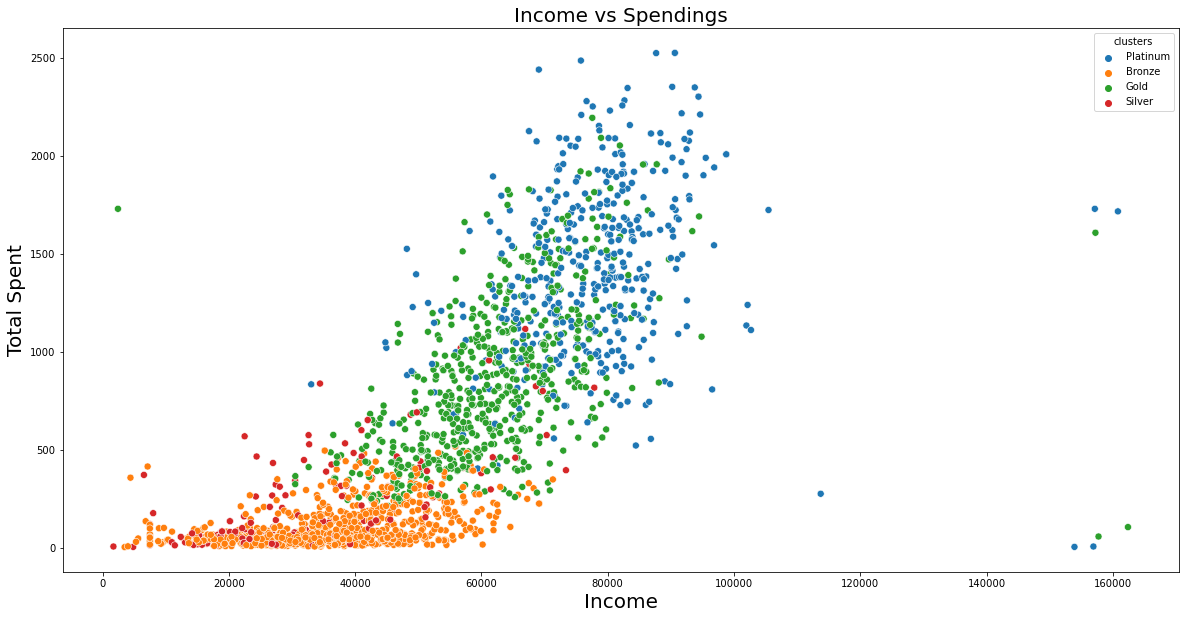

In [70]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=X,x='Income',y='total_spent',hue='clusters',s=50)
plt.title('Income vs Spendings',fontsize=20)
plt.xlabel("Income",fontsize=20)
plt.ylabel("Total Spent",fontsize=20)
plt.show()

### Spendings on different items by clusters

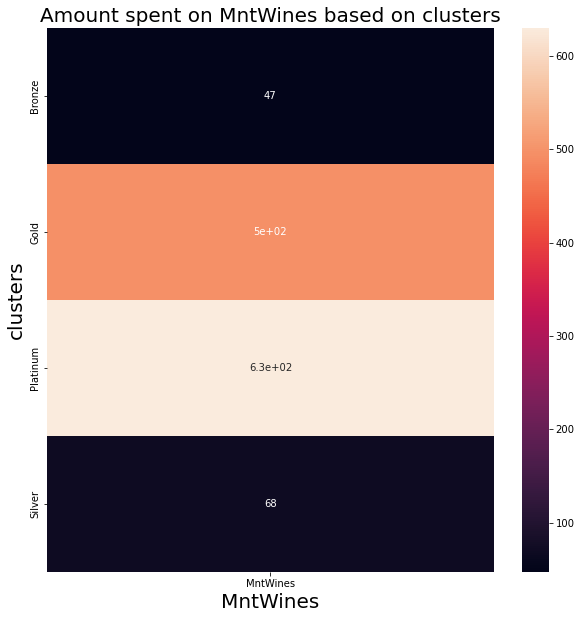

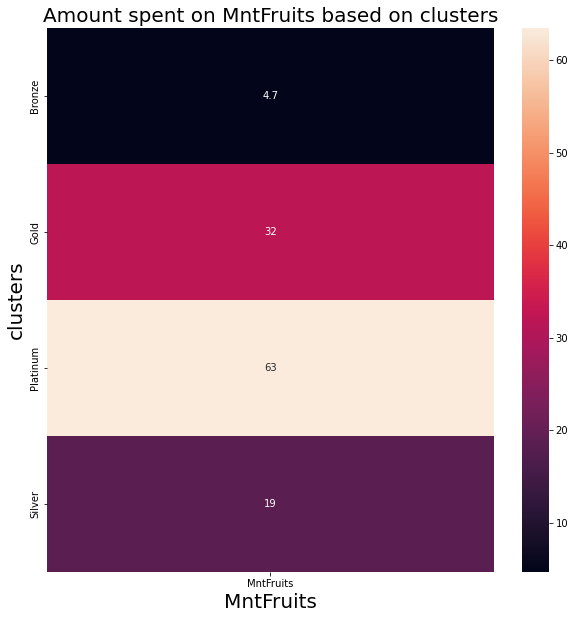

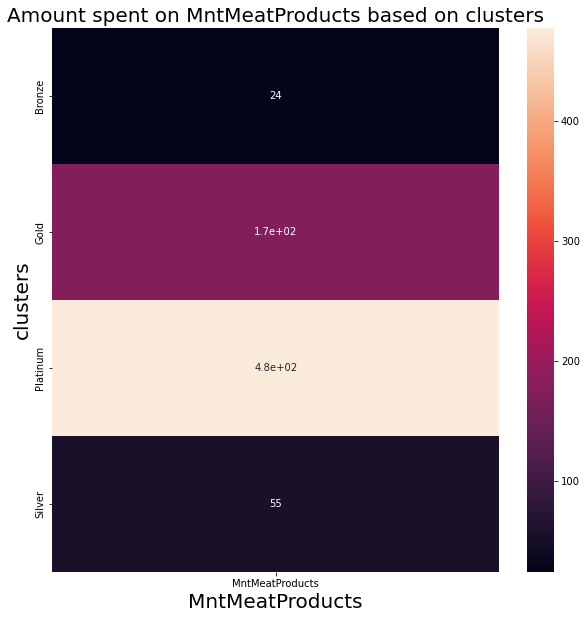

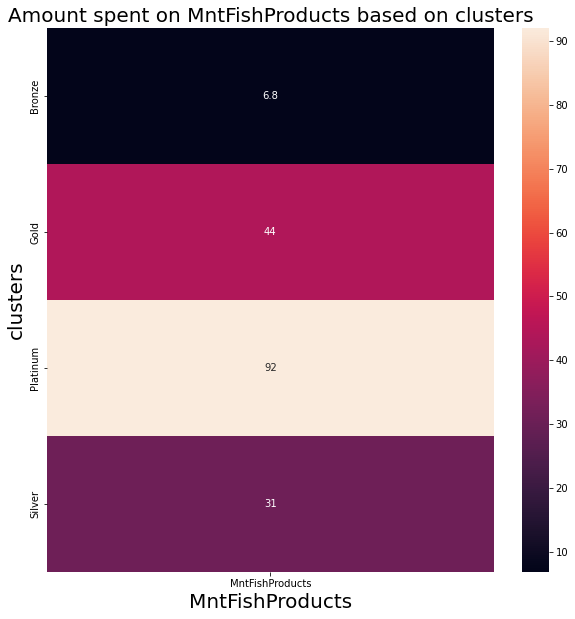

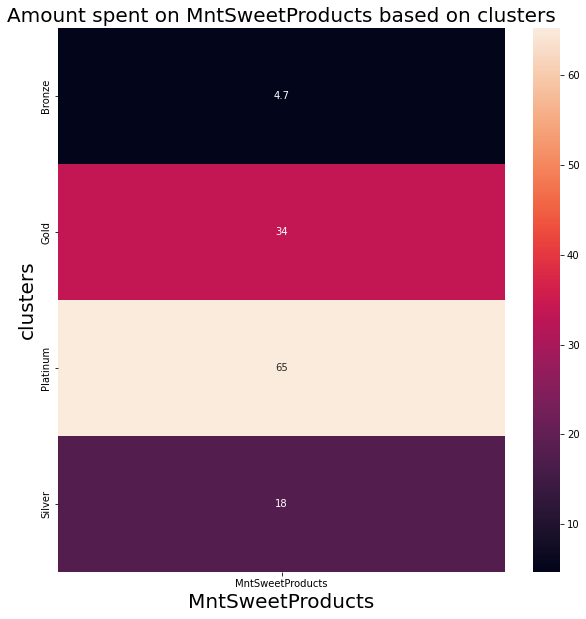

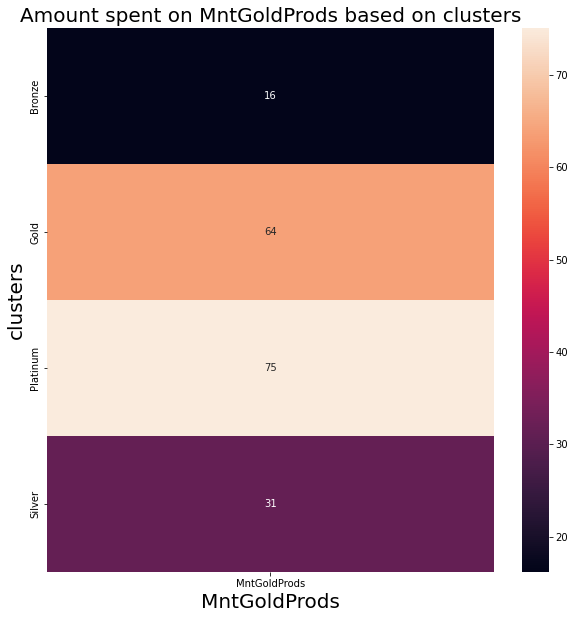

In [71]:
spendings_categories=['MntWines', 'MntFruits', 'MntMeatProducts', 
                               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for x in spendings_categories:
    table=pd.pivot_table(data=data,values=x,index='clusters')
    plt.figure(figsize=(10,10))
    sns.heatmap(data=table,annot=True)
    plt.title("Amount spent on {} based on clusters".format(x),fontsize=20)
    plt.xlabel(x,fontsize=20)
    plt.ylabel('clusters',fontsize=20)


### days engaged by clusters

<AxesSubplot:xlabel='clusters', ylabel='days_engaged'>

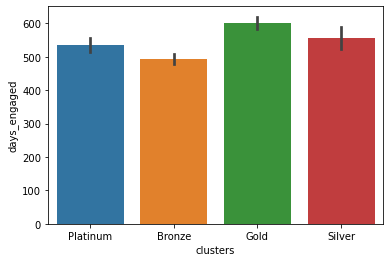

In [72]:
sns.barplot(data=data,x='clusters',y='days_engaged')

### Number of accepted campaigns by clusters

<AxesSubplot:xlabel='clusters', ylabel='Accepted_Campaigns'>

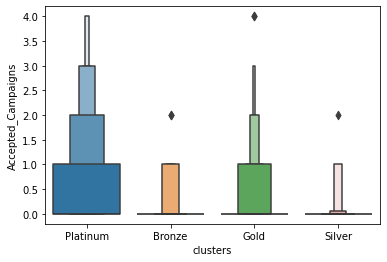

In [73]:
sns.boxenplot(data=data,x='clusters',y='Accepted_Campaigns')

### Number of deals purchased by clusters

<AxesSubplot:xlabel='clusters', ylabel='NumDealsPurchases'>

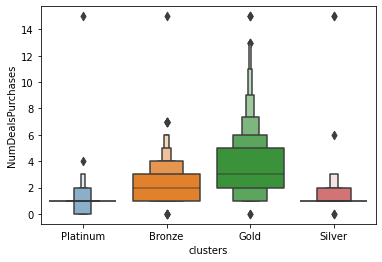

In [74]:
sns.boxenplot(data=data,x='clusters',y='NumDealsPurchases')

Text(0, 0.5, 'Clusters')

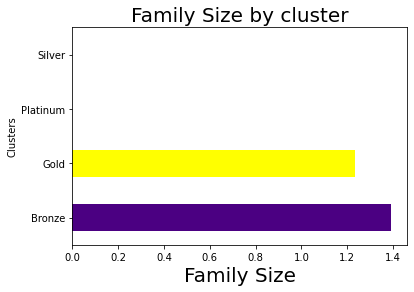

In [75]:
family_clusters=data.groupby('clusters')['Children'].mean()
family_clusters.plot(kind='barh',stacked=True,color=["indigo","yellow","pink","violet"])
plt.title('Family Size by cluster',fontsize=20)
plt.xlabel("Family Size",fontsize=20)
plt.ylabel("Clusters")

### Different Purchases made by customers 

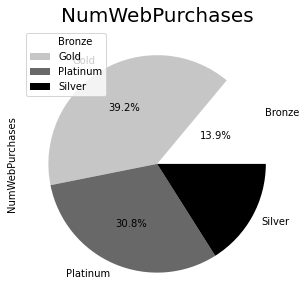

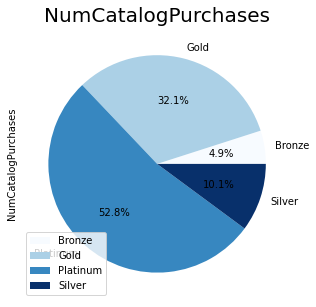

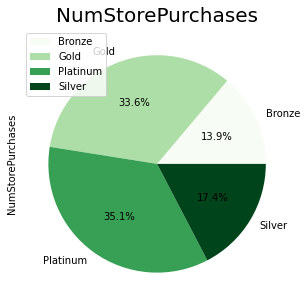

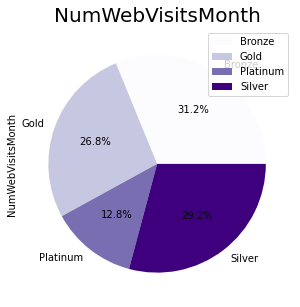

In [76]:
purchases=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
colors=['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
for purch in purchases:
    num=random.randint(0,len(purchases))
    fig,axes=plt.subplots(1,1,figsize=(15,5))
    table=(pd.pivot_table(data,values=purch,index='clusters'))
    table.plot(kind='pie',subplots=True,ax=axes,autopct='%1.1f%%',cmap=colors[num])
    plt.title(purch,fontsize=20)

#### Conclusion

###### Cluster 0 (Bronze)
- It has 929 customers, most crowded segment
- Low income.
- Low spending
- Mostly parents (maximum 5 members in the family, at least 2 members in thr family).
- They have more deal purchases, these customers cab be target audience for deals
- Highest number of web visits.
###### Cluster 1 (Platinum)
- It has 472 customers.
- These customers have accepted more campaigns, target audience for campaigns.
- Highest Income
- Highest Spendings
- Minimum age is less than minimum age of Cluster 0, simillarly for maximum age is greater than maximum age of Cluster 0.
- Not a parent (maximum 2 members in the family)
- Highest number of purchases from catalog and stores.
- Target audience for campaigns.
- Has highest spendings in meat, wine, fruits, sweet products.
###### Cluster 2 (Gold)
- It has 651 customers.
- Middle income.
- Average  spending.
- Maximum 3 members in the family.
- Target audience for Web Purchases and store purchases.
- Target audience for deals and store purchases.
###### Cluster 3 (Silver)
- It has 160 customers.
- Not parents (maximum 2 members in the family)
- Low income
- Average spending.